# Supply Chain Data Set

## PART - 2 - Exploratory Data Analysis

## Uploading the data after cleaning and feature engineering

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Cleaned_DataCoSupplyChainDataset.csv')

In [3]:
df.shape

(180519, 33)

In [4]:
df.columns

Index(['Type', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Id', 'Customer Segment', 'Customer State', 'Department Name',
       'Market', 'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Id', 'Order Item Discount', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Profit Per Order',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'CustomerFullName',
       'Delay', 'Sales Range'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Type                        180519 non-null  object 
 1   Sales per customer          180519 non-null  int64  
 2   Delivery Status             180519 non-null  object 
 3   Late_delivery_risk          180519 non-null  int64  
 4   Category Id                 180519 non-null  int64  
 5   Category Name               180519 non-null  object 
 6   Customer City               180519 non-null  object 
 7   Customer Country            180519 non-null  object 
 8   Customer Id                 180519 non-null  int64  
 9   Customer Segment            180519 non-null  object 
 10  Customer State              180519 non-null  object 
 11  Department Name             180519 non-null  object 
 12  Market                      180519 non-null  object 
 13  Order City    

In [6]:
df.describe()

,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Order Id,Order Item Discount,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Profit Per Order,Delay
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,182.407680,0.548291,31.851451,6691.379495,36221.894903,20.664741,90260.000000,140.401492,0.120647,2.127638,203.772096,21.974989,3.497654
std,119.955692,0.497664,15.640064,4162.918106,21045.379569,21.800901,52111.490959,139.689549,0.466796,1.453451,132.273077,104.433526,1.623722
min,7.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,9.000000,-2.750000,1.000000,9.990000,-4274.979980,0.000000
25%,104.000000,0.000000,18.000000,3258.500000,18057.000000,5.400000,45130.500000,50.000000,0.080000,1.000000,119.980003,7.000000,2.000000
50%,163.000000,1.000000,29.000000,6457.000000,36140.000000,14.000000,90260.000000,59.000000,0.270000,1.000000,199.919998,31.520000,3.000000
75%,247.000000,1.000000,45.000000,9779.000000,54144.000000,29.990000,135389.500000,199.000000,0.360000,3.000000,299.950012,64.800003,5.000000
max,1939.000000,1.000000,76.000000,20757.000000,77204.000000,500.000000,180519.000000,1999.000000,0.500000,5.000000,1999.989990,911.799988,6.000000


## Correlation Matrix 

<AxesSubplot:>

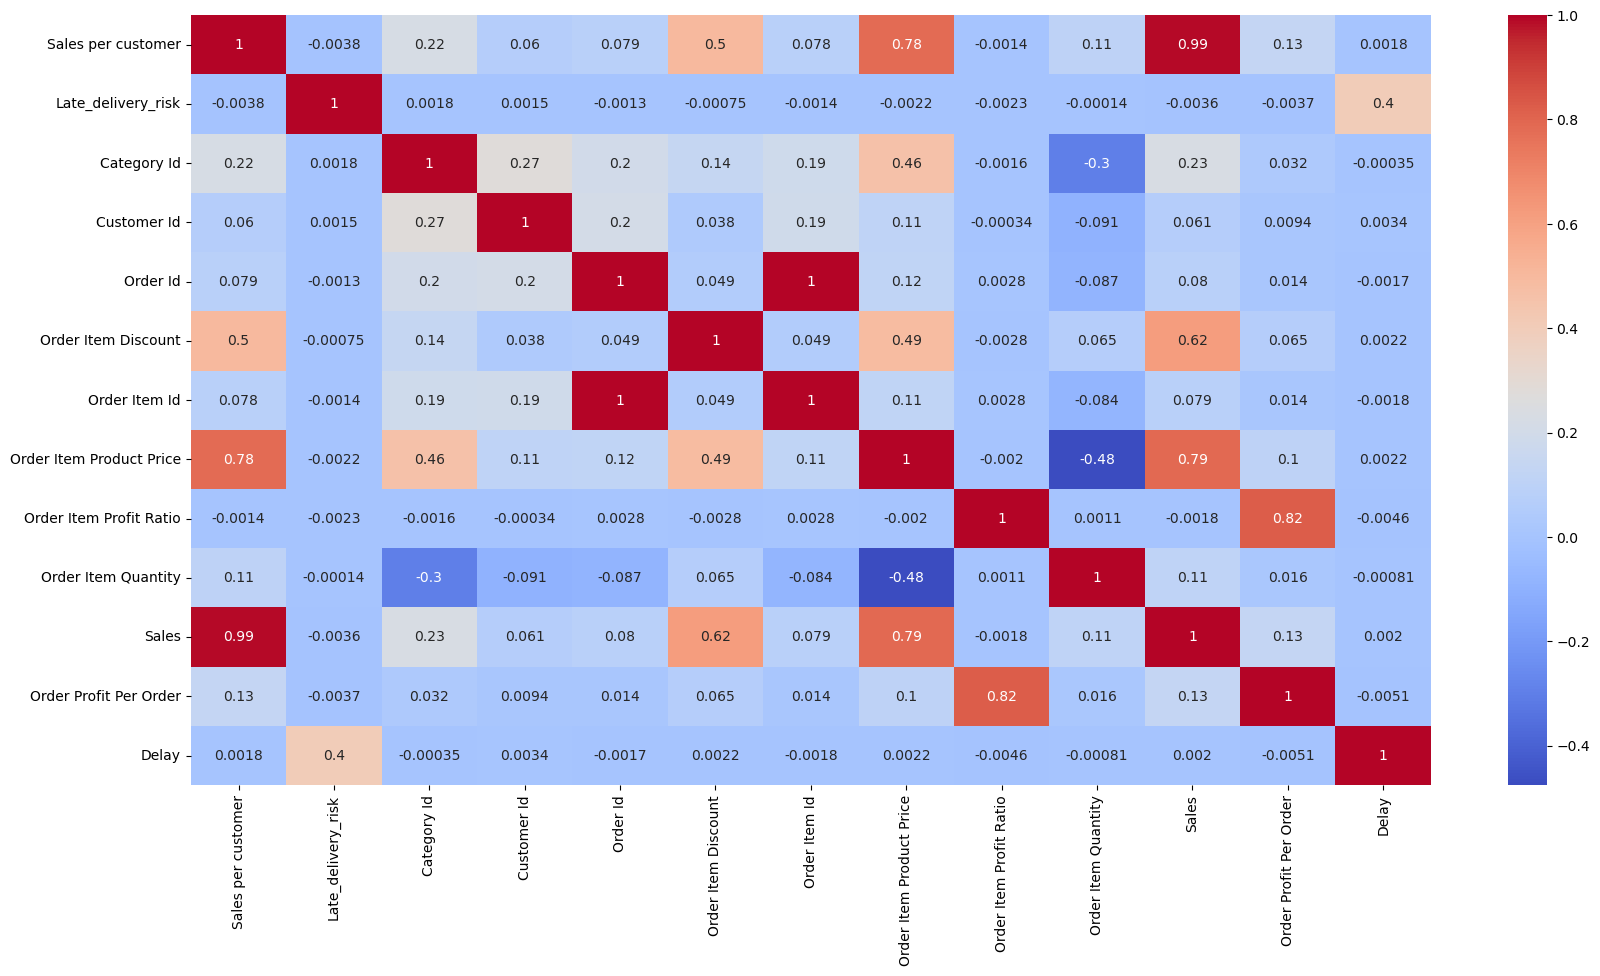

In [7]:
fig, ax = plt.subplots(figsize= (20,10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, ax = ax)

## 1)Shipment Delay Analysis 

#### 1.1-Department Name Distribution

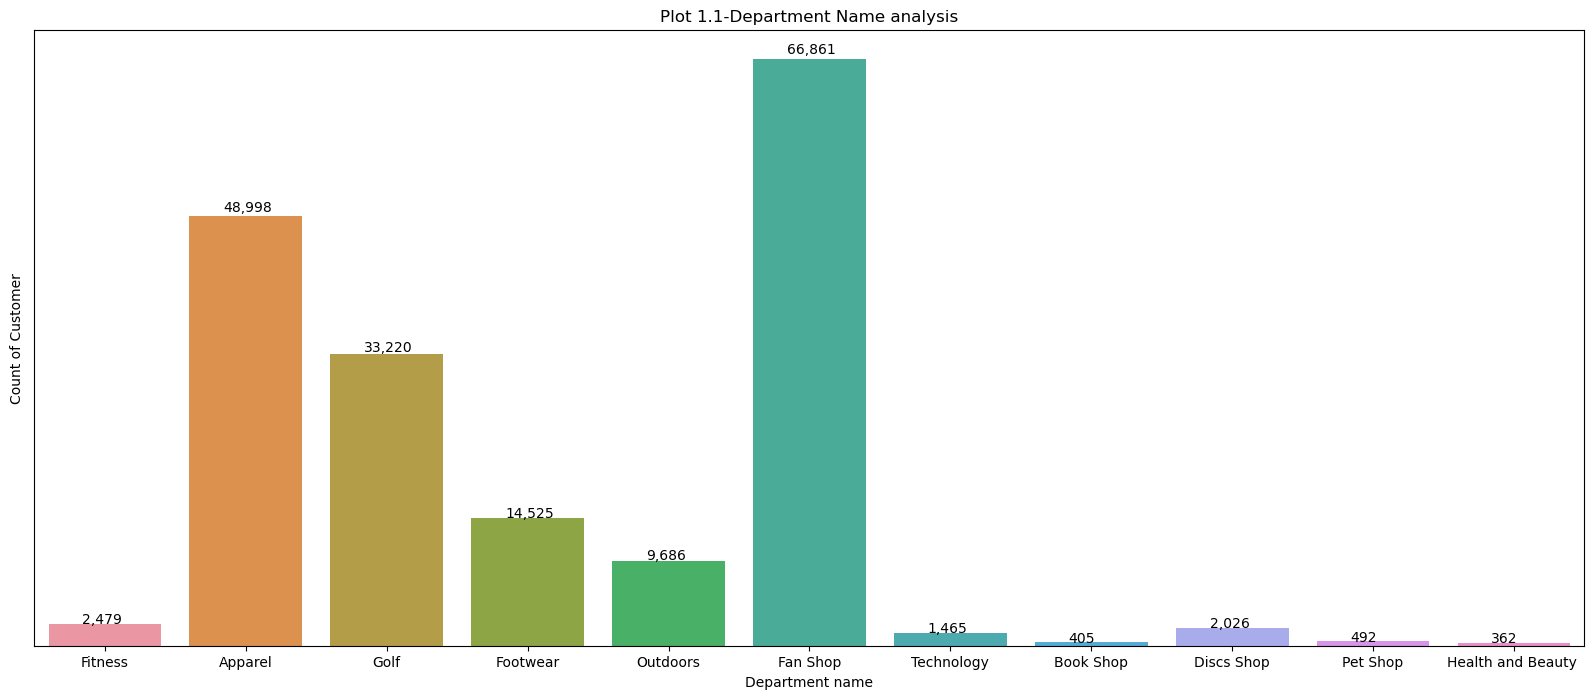

In [8]:
plt.figure(figsize=(20,8))
plt.title("Plot 1.1-Department Name analysis")

df1 = sns.countplot(x=df['Department Name'])
for p in df1.patches:
    df1.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Department name")
plt.ylabel("Count of Customer");
plt.yticks([])
plt.show()

#### 1.2- Avg shipment Delay by Product Category

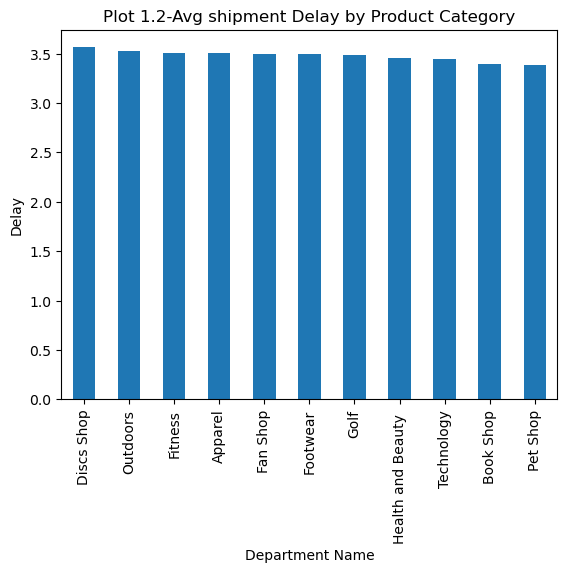

In [9]:
df.groupby('Department Name')['Delay'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('Plot 1.2-Avg shipment Delay by Product Category')
plt.xlabel('Department Name')
plt.ylabel('Delay')

plt.show()

#### 1.3-Avg shipment Delay for different mode

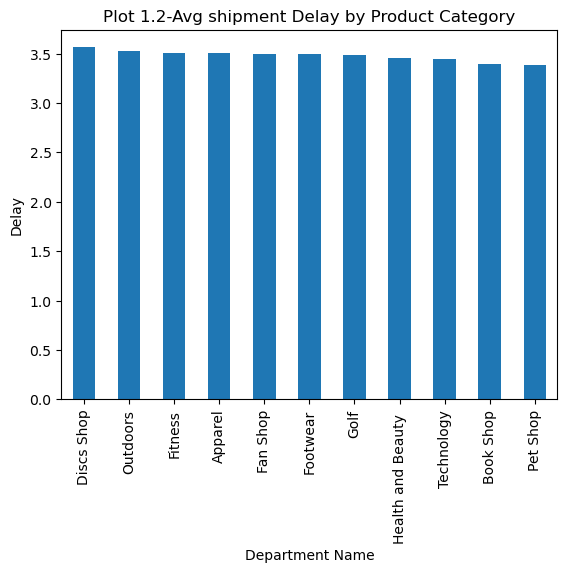

In [10]:
df.groupby('Department Name')['Delay'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('Plot 1.2-Avg shipment Delay by Product Category')
plt.xlabel('Department Name')
plt.ylabel('Delay')

plt.show()

#### 1.4-Top 10 countries with late deliveries

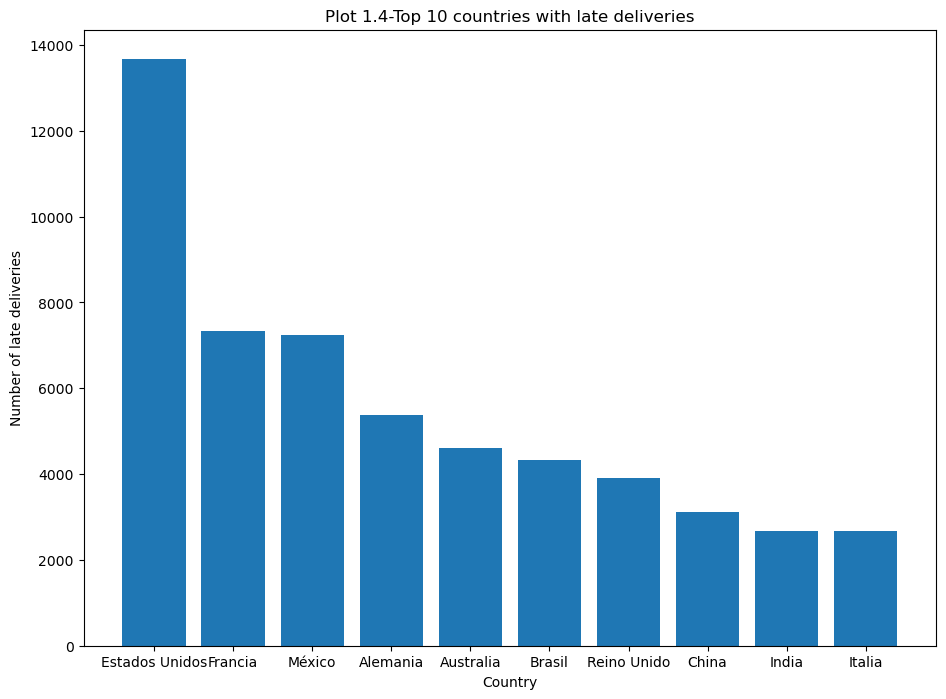

In [11]:
df1 = df[df['Delivery Status'] == 'Late delivery'].groupby('Order Country')['Delivery Status'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(11,8))
plt.bar(df1.index, df1.values)
plt.xlabel('Country')
plt.ylabel('Number of late deliveries')
plt.title('Plot 1.4-Top 10 countries with late deliveries')
plt.show()

#### 1.5-Shipping Mode, Delay, Delivery Status and Customer Country

<AxesSubplot:title={'center':'Plot 1.5-Shippimg Mode, Delay, Delivery Status, Customer Country'}, ylabel='Shipping Mode,Delivery Status,Customer Country'>

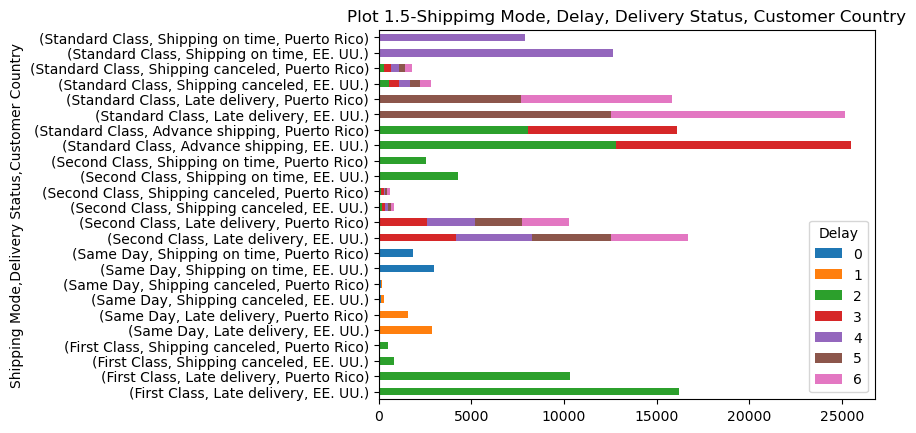

In [12]:
df1 = df.groupby(['Shipping Mode','Delay','Delivery Status','Customer Country'])['Customer Country'].count()
df1.unstack(level=1).plot(kind= 'barh', stacked=True, title='Plot 1.5-Shippimg Mode, Delay, Delivery Status, Customer Country')

## 

### Shipment Delay Analysis Observations

**Plot 1.1-** In this plot each bar represents a department, and its height corresponds to the number of customers in that department. The bar clearly shows that fanshop has more number of customer. The exact value is 66861.

**Plot 1.2-** By looking at the plot, we can observe which departments have the highest and lowest average shipment delays. We can infer that Disc shop has the highest delay, which is more than 3.5 days.
    
**Plot 1.3-** By looking at the plot, we can observe which shipping mode have the highest and lowest average shipment delays. Standard class and second class has almost same average shipment delays(almost average 4 days).
    
**Plot 1.4-** By looking at plot, we can observe which country has highest late deliveries. We can concur that Estados Unidos have highest number of deliveries(somewhere above count of 13000 deliveries). We can compare performance of different country using this graph.
    
**Plot 1.5-** This plot can help find order status and delivery status of EE UU and Puerto Rico. We can observe that EE UU country has recieved more orders when compared to Puerto Rico. Most delay can be observed in EE UU when customer's order status is second class. This graph can give us insights into identifying areas where improvements can be made in order fulfillment and delivery processes.

## 2)Payment Fraud Analysis

#### 2.1-Percentage of Orders with Suspected Fraud Status")


<AxesSubplot:title={'center':'Plot 2.1-Percentage of Orders with Suspected Fraud Status'}, ylabel='Order Status'>

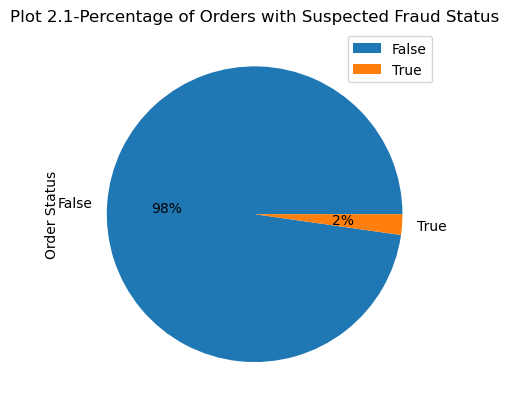

In [13]:
df1=df.groupby(by=[df['Order Status']== 'SUSPECTED_FRAUD']).count().plot(kind='pie', y='Order Status',autopct='%.0f%%')
df1.set_title("Plot 2.1-Percentage of Orders with Suspected Fraud Status")
df1

#### 2.2-Supected fraud by Type

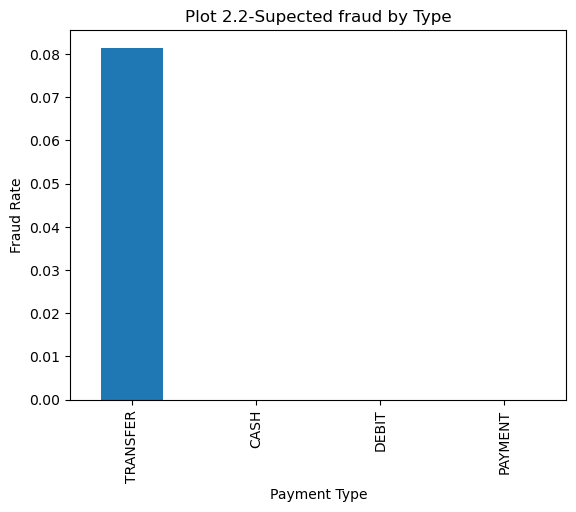

In [14]:
df["Payment_Fraud"] = df["Order Status"].apply(lambda x: 1 if x=="SUSPECTED_FRAUD" else 0)
Payment_Fraud_df = df.groupby("Type")["Payment_Fraud"].mean().sort_values(ascending=False)
Payment_Fraud_df.plot(kind="bar")
plt.title("Plot 2.2-Supected fraud by Type")
plt.xlabel("Payment Type")
plt.ylabel("Fraud Rate")
plt.show()

#### 2.3-Number of customers by payment fraud and customer segment

Text(0.5, 1.0, 'Plot 2.3-Number of customers by payment fraud and customer segment\n')

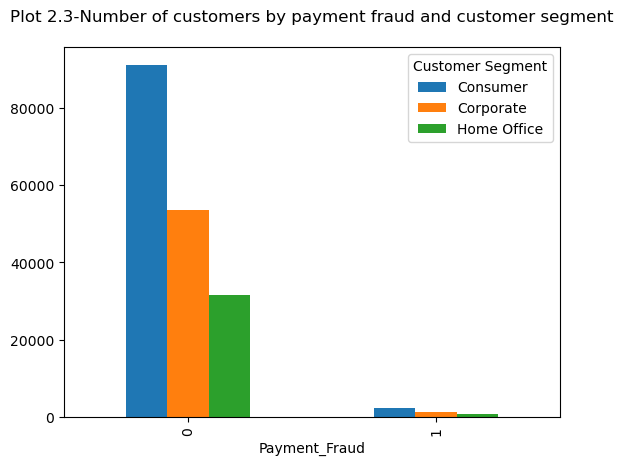

In [15]:
df1 = df.groupby(['Payment_Fraud','Customer Segment'])['Customer Segment'].count()
df2=df1.unstack(level=1).plot.bar()
df2.set_title('Plot 2.3-Number of customers by payment fraud and customer segment\n')
#0 - not flagged for suspected fraud
#1 - flagged for suspected fraud

#### 2.4 - Number of transactions by payment fraud, customer country, and transaction type

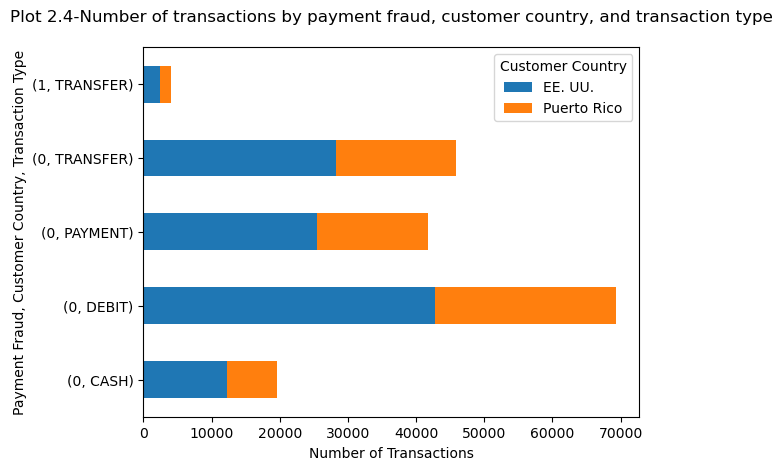

In [16]:
df1 = df.groupby(['Payment_Fraud','Customer Country','Type'])['Type'].count()
df2 = df1.unstack(level=1).plot(kind= 'barh', stacked=True, title='Plot 2.4-Number of transactions by payment fraud, customer country, and transaction type\n')
df2.set_xlabel('Number of Transactions')
df2.set_ylabel('Payment Fraud, Customer Country, Transaction Type')
plt.show()

### Payment Fraud Analysis Observations

**Plot 2.1-**  From graph, we can observe that there has been 2% fraudulent cases.

**Plot 2.2-** The graph helps us concur that fraud is only observed when the customer used transfer type payment mode.

**Plot 2.3-** '1' in the y axis indicates suspected fraud orders. So we can concur from the graph that consumer segment has the most fraudulent case. 

**Plot 2.4-** The graph help gives us a clear result that most fraud case is been observed in EE UU region.

## 3)Order Analysis


#### 3.1- Sales Distrubution in terms of range

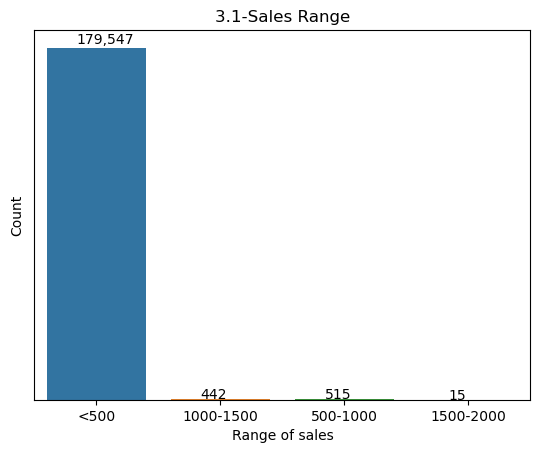

In [17]:
plt.title("3.1-Sales Range")

df1 = sns.countplot(x=df['Sales Range'])
for p in df1.patches:
    df1.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Range of sales")
plt.ylabel("Count");
plt.yticks([])
plt.show()

#### 3.2-Top 10 Profitable Regions

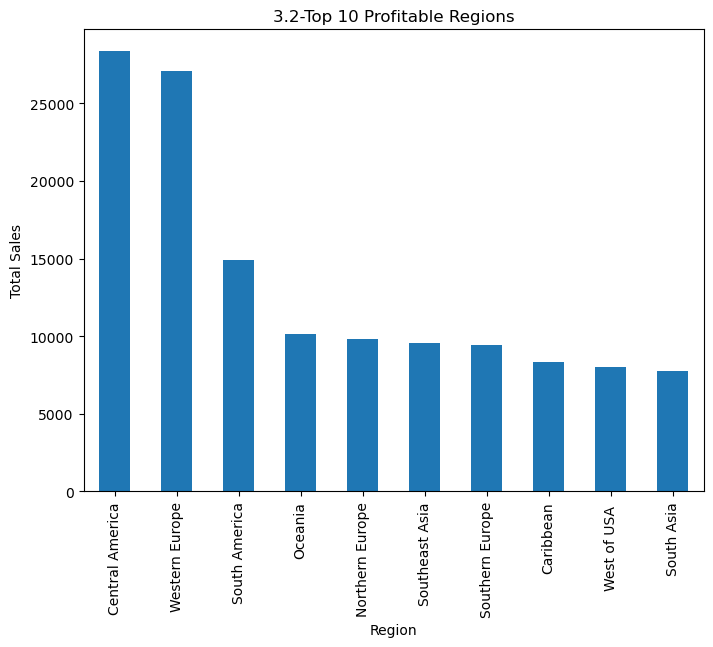

In [18]:
df1 = df.groupby(['Order Region'])['Sales'].count().sort_values(ascending=False).head(10)
df1.plot(kind='bar', figsize=(8,6), title='3.2-Top 10 Profitable Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


#### Number of Delays by Customer Country

Text(0.5, 1.0, 'Plot 3.3-Number of Delays by Customer Country')

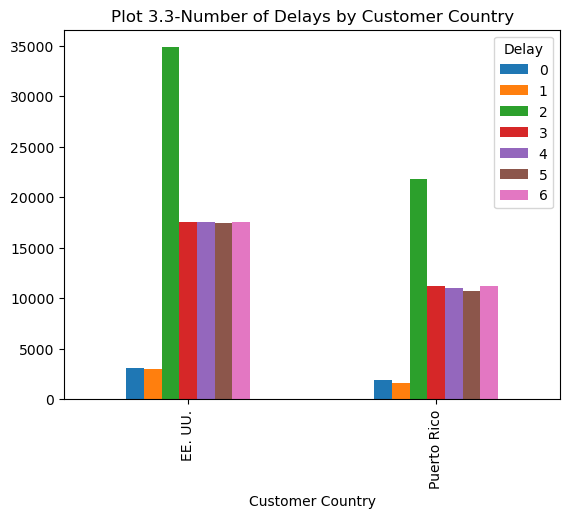

In [19]:
df1 = df.groupby(['Customer Country','Delay'])['Delay'].count()
df1.unstack(level=1).plot.bar()
plt.title("Plot 3.3-Number of Delays by Customer Country")

#### List all the categories and its Sales

In [20]:
df1=df.groupby('Category Name')['Sales'].sum().sort_values(ascending=False).head(10)
df2 = pd.DataFrame(df1)
df2

,Sales
Category Name,
Fishing,6.929654e+06
Cleats,4.431943e+06
Camping & Hiking,4.118426e+06
Cardio Equipment,3.694843e+06
Women's Apparel,3.147800e+06
Water Sports,3.113845e+06
Men's Footwear,2.891758e+06
Indoor/Outdoor Games,2.888994e+06
Shop By Sport,1.309522e+06


#### Top 10 Categories by Sales

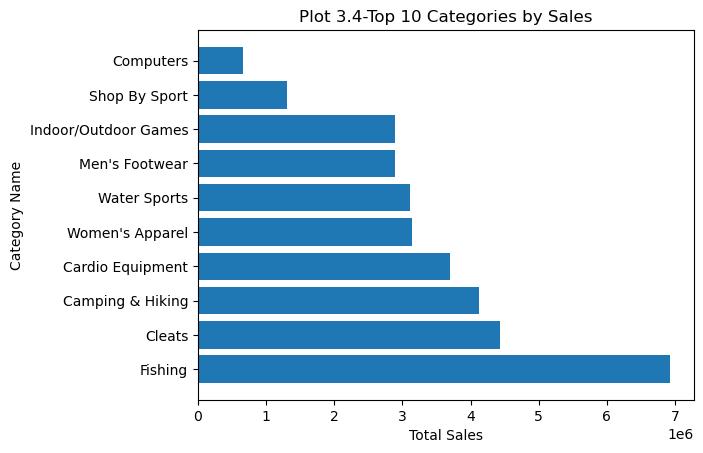

In [21]:
df1 = df.groupby('Category Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.barh(df1.index, df1.values)
plt.title('Plot 3.4-Top 10 Categories by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Category Name')
plt.show()

#### Total Sales Affected by Delayed Orders

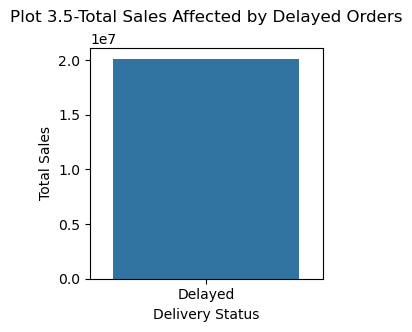

In [22]:
delayed_orders_df = df[df['Delivery Status'] == 'Late delivery']
delayed_sales_df = delayed_orders_df['Sales'].sum()


plt.figure(figsize=(3, 3)) 
sns.barplot(x=['Delayed'], y=[delayed_sales_df])

plt.title('Plot 3.5-Total Sales Affected by Delayed Orders\n')
plt.xlabel('Delivery Status')
plt.ylabel('Total Sales')
plt.show()

#### Daily Sales Affected by Delayed Orders

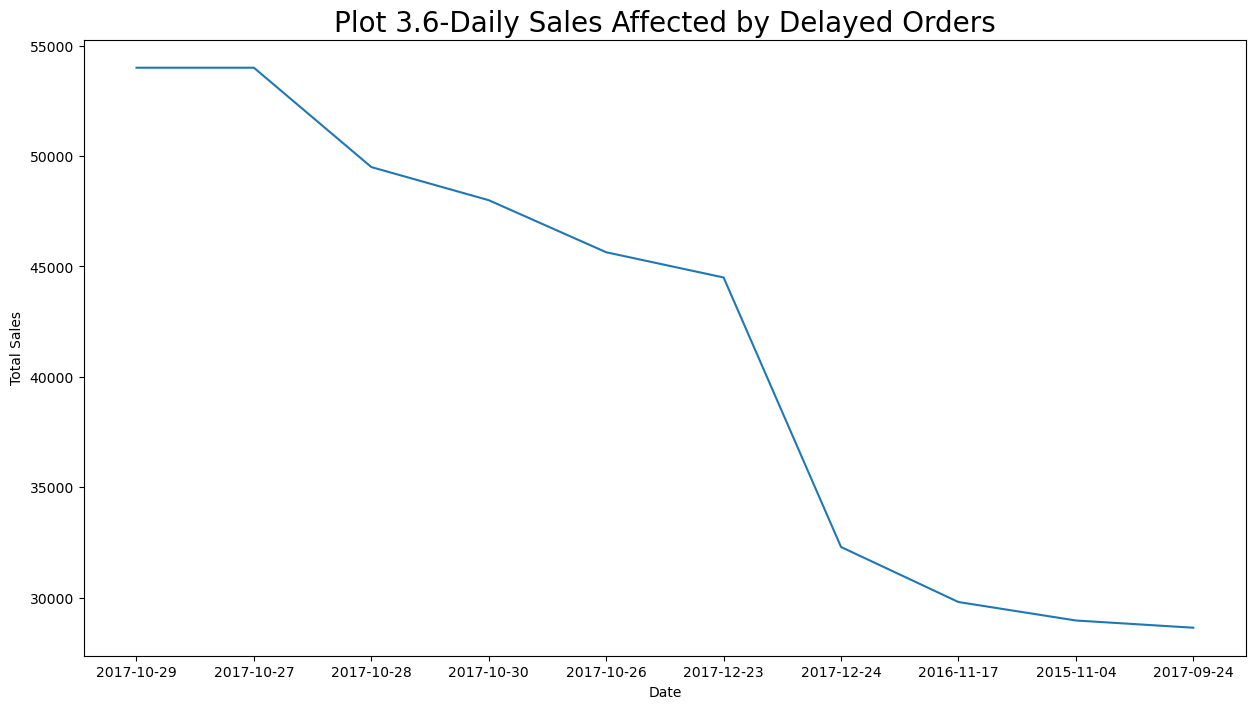

In [23]:
delayed_orders_df = df[df['Delivery Status'] == 'Late delivery']


daily_sales = delayed_orders_df.groupby('order date (DateOrders)')['Sales'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(15, 8)) 
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Plot 3.6-Daily Sales Affected by Delayed Orders',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

 ####  Total Sales Affected by Delayed Orders by Region

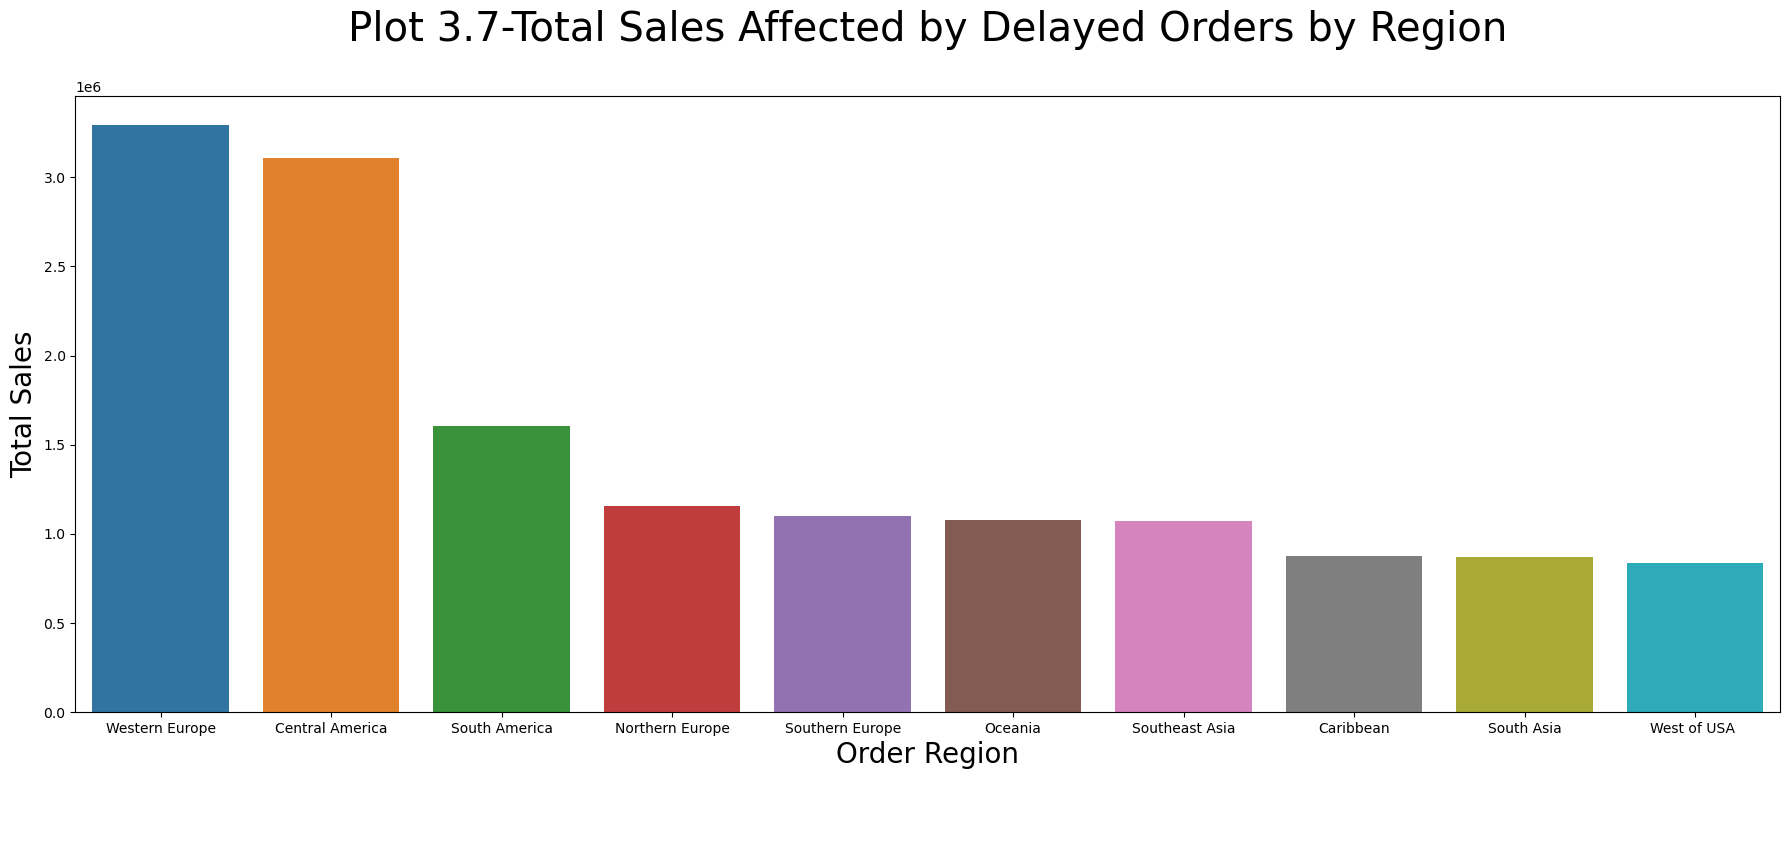

In [24]:
delayed_orders_df = df[df['Delivery Status'] == 'Late delivery']
delayed_sales_region_df = delayed_orders_df.groupby('Order Region')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(22, 8))
sns.barplot(x=delayed_sales_region_df.index, y=delayed_sales_region_df.values)
plt.title('Plot 3.7-Total Sales Affected by Delayed Orders by Region\n',fontsize=29)
plt.xlabel('Order Region\n\n',fontsize=20)
plt.ylabel('Total Sales',fontsize=20)
plt.show()


### Order Analysis Observations

**Plot 3.1-** From this graph we can observe different count of sales for a given sales range. The sales for less than 500 count is the highest with value of 179547.

**Plot 3.2-** We can see the results of top 10 region with highest amount of sales with Central America leading as the top most contender for sales.

**Plot 3.3-** The graph helps us distinguish the country with most delays. EE UU has the highest number of delays.

**Plot 3.4-** This graph helps us infer top 10 categories which was sold to customers. Fishing is the most sold category.

**Plot 3.5-** By looking at the plot, we can observe how much sales were affected due to delay

**Plot 3.6-** The graph indicates how much the total sales were impacted by delayed orders on each day. You can observe a drastic delay from the 23rd to the 24th of December 2017. we can observe how much money is affected by delays. 

**Plot 3.7-** The graph gives us observation about total sales affected by delayed orders in the top 10 regions. We can see that Wester Europe was most affected by the delays with central America falling behind it.

## 4)Customer Analysis

#### List top 10  Customer full name with highest total sales

In [25]:
df1 = df.groupby(['CustomerFullName'])['Sales'].sum().sort_values(ascending=False).head(10)
df1

CustomerFullName
Mary Smith           4.771646e+06
Robert Smith         1.522310e+05
James Smith          1.479244e+05
David Smith          1.457768e+05
John Smith           1.298826e+05
William Smith        1.085233e+05
Michael Smith        9.284303e+04
Elizabeth Smith      9.051602e+04
Mary Jones           8.886048e+04
Christopher Smith    8.527105e+04
Name: Sales, dtype: float64

#### Top 10 Customers by using Total Sales

<AxesSubplot:title={'center':'Plot4.1-Top 10 Customers by using Total Sales'}, xlabel='Customer Id', ylabel='Total Sales'>

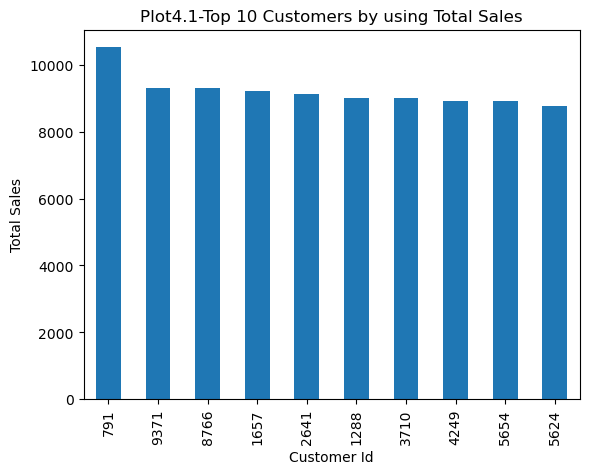

In [26]:
df1 = df.groupby('Customer Id')['Sales'].sum().sort_values(ascending=False).head(10)
df1.plot(kind='bar', xlabel='Customer Id', ylabel='Total Sales', title='Plot4.1-Top 10 Customers by using Total Sales')


#### Top 10 Order Regions by Total Sales

<AxesSubplot:title={'center':'Plot4.2-Top 10 Order Regions by Total Sales'}, xlabel='Order Region', ylabel='Total Sales'>

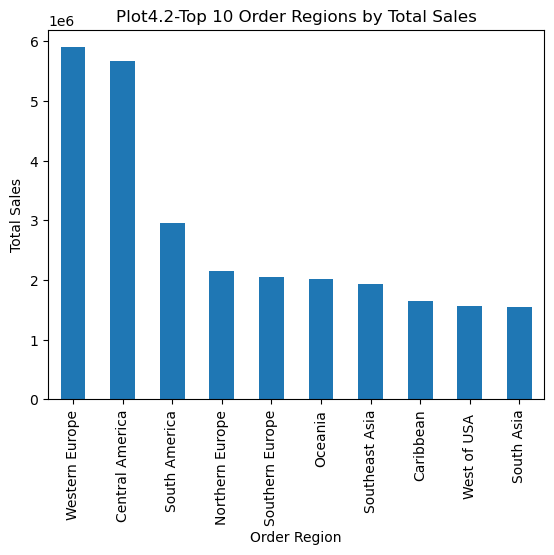

In [27]:
df1 = df.groupby('Order Region')['Sales'].sum().sort_values(ascending=False).head(10)
df1.plot(kind='bar', xlabel='Order Region', ylabel='Total Sales', title='Plot4.2-Top 10 Order Regions by Total Sales')


#### Loyal Customers by Region

<AxesSubplot:title={'center':'Plot4.3-Loyal Customers by Region'}, ylabel='Order Region'>

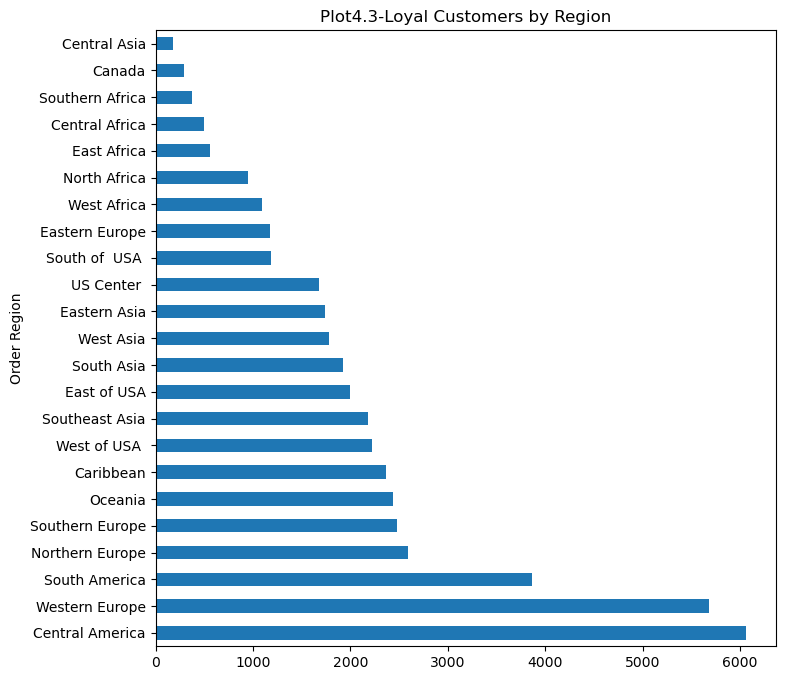

In [28]:
df1_loyalcustomers = df.groupby('Customer Id')['Order Id'].nunique()
df1_loyalcustomers = df1_loyalcustomers[df1_loyalcustomers >= 3].index.tolist()
df2 = df[df['Customer Id'].isin(df1_loyalcustomers)]
df3 = df2.groupby('Order Region')['Customer Id'].nunique().sort_values(ascending=False)
df3.plot(kind='barh', figsize=(8, 8), title='Plot4.3-Loyal Customers by Region')

# df2--->creates a new variable where 'Customer Id' column matches one of the df1_loyalcustomers values.
# df3---->counts the number of loyal customers by region

#### Customer Region, Customer Segment and Late delivery risk

<AxesSubplot:title={'center':'Plot4.4-Customer Region, Customer Segment and Late delivery risk (Risk=0)'}, ylabel='Order Region,Late_delivery_risk'>

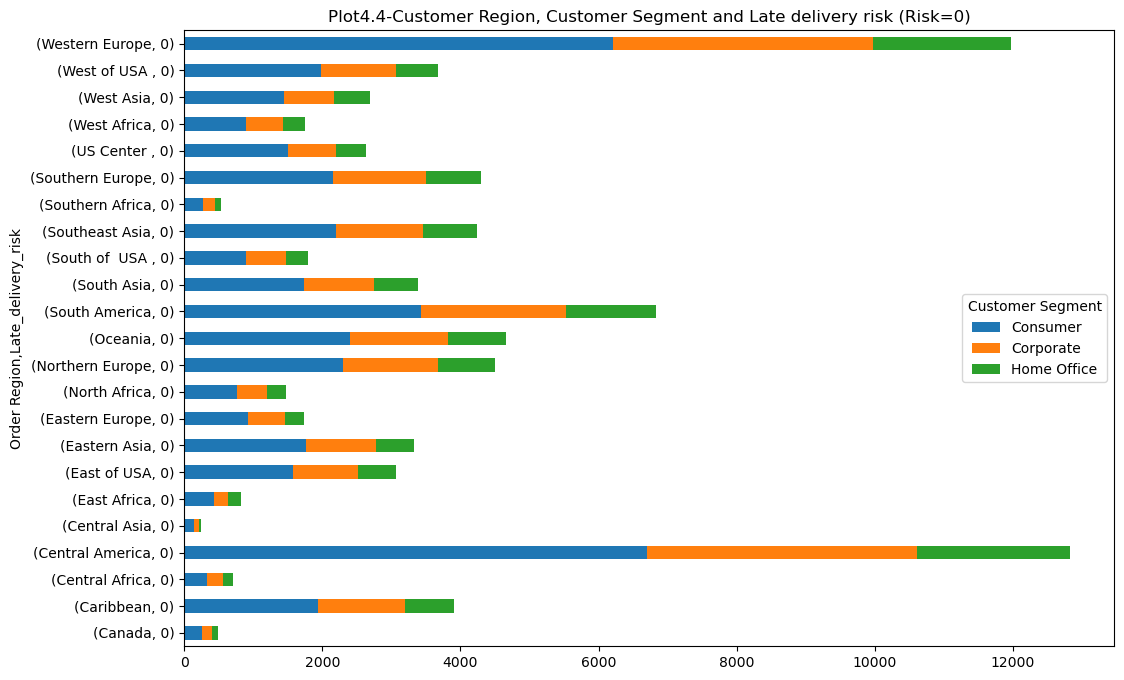

In [29]:
df1 = df.groupby(['Order Region','Customer Segment','Late_delivery_risk'])['Late_delivery_risk'].count()
df1 = df1[df1.index.get_level_values('Late_delivery_risk')==0]
df1.unstack(level=1).plot(kind='barh', stacked=True, figsize=(12, 8), title='Plot4.4-Customer Region, Customer Segment and Late delivery risk (Risk=0)')


### Customer Analysis Observations

**Plot 4.1-** From this graph we can observe which customer has the highest sales. Customer ID 719, Mary Smith, has the highest sales count.

**Plot 4.2-** From this graph we can observe top 10 region with highest sales. We can observe that Western Europe has the highest sales.

**Plot 4.3-** From this graph we can observe number of loyal customers by region. We can observe that Central America has the most loyal customers.

**Plot 4.4-** This graph helps us find distribution of orders across different regions and customer segments with a late delivery risk of 0.
Consumer product has the highest sales in Central america with a late delivery risk of 0.

## 5)Market Analysis

####  Market Distribution

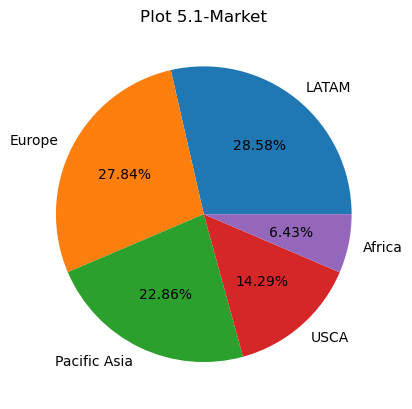

In [30]:
plt.pie(df['Market'].value_counts().values,labels=df['Market'].value_counts().index,  autopct='%.2f%%')
plt.title('Plot 5.1-Market')
plt.show()

#### Number of Orders by Delivery Status and Market

Text(0.5, 1.0, 'Plot 5.2-Number of Orders by Delivery Status and Market')

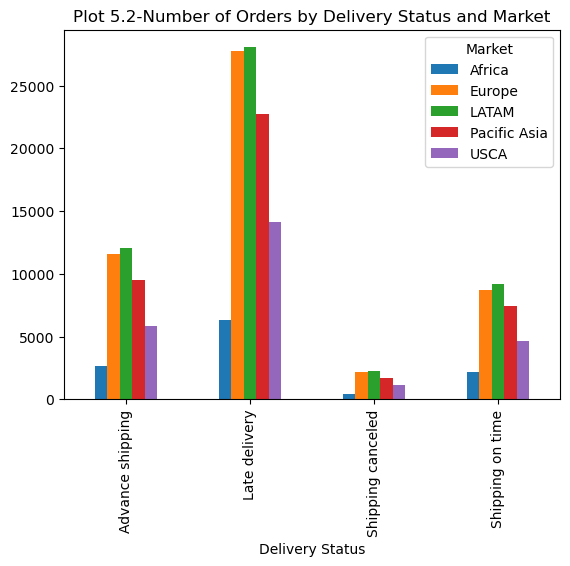

In [31]:
df1 = df.groupby(['Delivery Status','Market'])['Market'].count()
df1.unstack(level=1).plot.bar()
plt.title("Plot 5.2-Number of Orders by Delivery Status and Market")

#### Top 5 Most Profitable Markets by Product

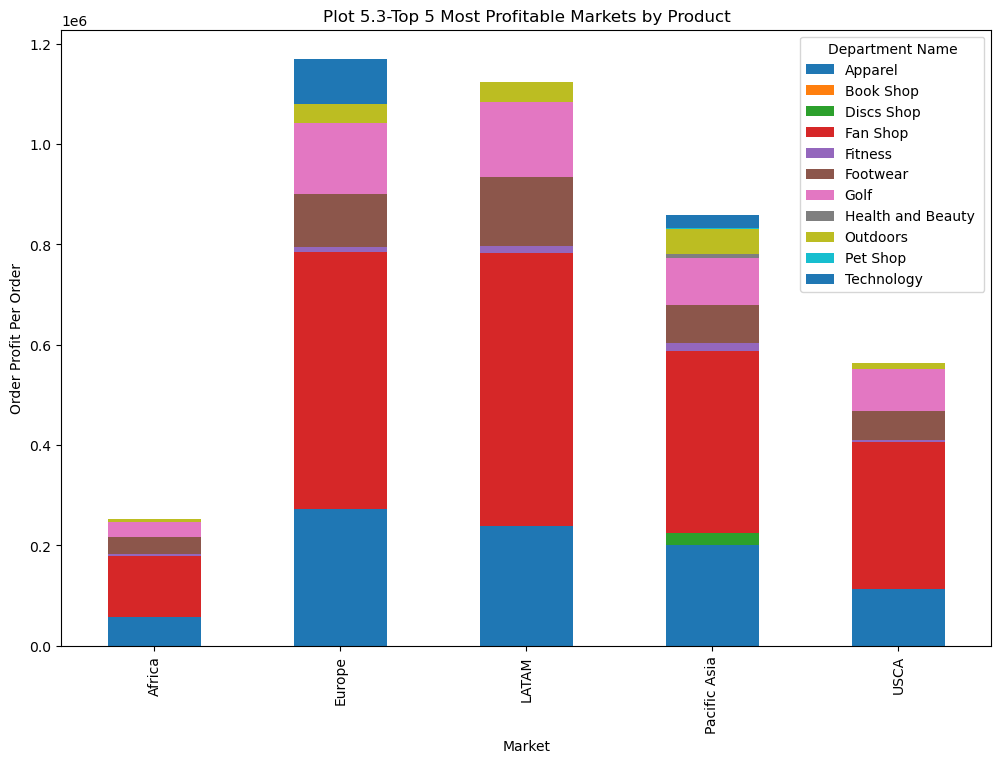

In [32]:
df1 = df.groupby(['Market', 'Department Name'])['Order Profit Per Order'].sum().reset_index()
# reset_index() will convert df1 into DataFrame with grouped columns as regular column. 
#It will also assign a new index to the DataFrame that is sequential integer index starting from 0.



df1 = df1.sort_values(by='Order Profit Per Order', ascending=False)


top_marketsdf = df1.groupby('Department Name').head(5)
fig, df1 = plt.subplots(figsize=(12, 8))
top_marketsdf.pivot('Market', 'Department Name', 'Order Profit Per Order').plot(kind='bar', stacked=True, ax=df1)
df1.set_xlabel('Market')
df1.set_ylabel('Order Profit Per Order')
df1.set_title('Plot 5.3-Top 5 Most Profitable Markets by Product')
plt.show()

### Market Analysis Observations

**Plot 5.1-** The graph shows percentage of each market of the dataset. Latam has the highest market when compared with others.

**Plot 5.2-** The graph shows delivery status of each market.

**Plot 5.3-** The graph helps us analyse the most profitable market by department name. You can observe from the graph that Europe has the most profitable market.

## 6)Profit Analysis

#### Top 10 Products by Profit Margin

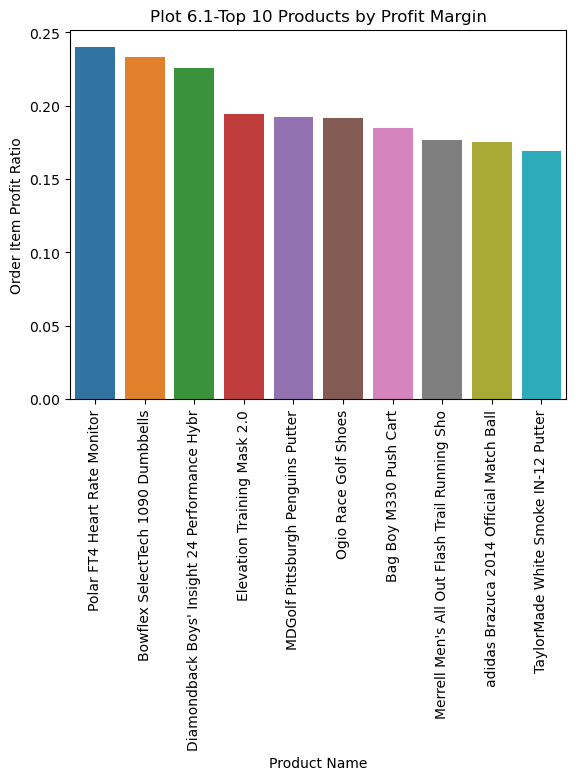

In [33]:
#product which generates highest profit margin

df1 = df.groupby('Product Name')['Order Item Profit Ratio'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=df1.index, y=df1.values)
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Order Item Profit Ratio')
plt.title('Plot 6.1-Top 10 Products by Profit Margin')
plt.show()


#### Most profitable customer segment

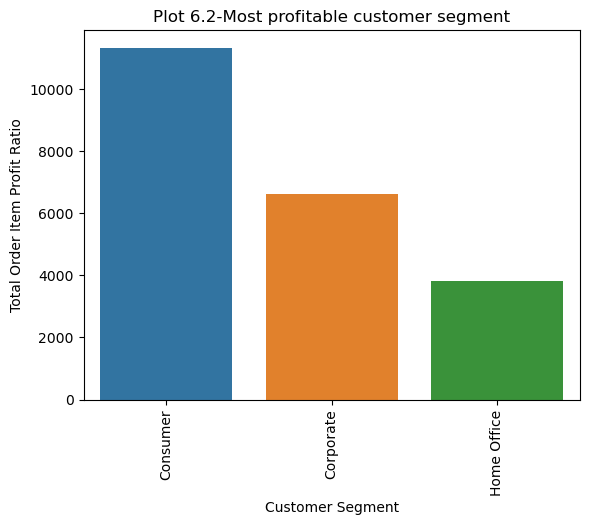

In [34]:
df1 = df.groupby('Customer Segment')['Order Item Profit Ratio'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=df1.index, y=df1.values)
plt.xticks(rotation=90)
plt.xlabel('Customer Segment')
plt.ylabel('Total Order Item Profit Ratio')
plt.title('Plot 6.2-Most profitable customer segment')
plt.show()


#### Most Profitable Region

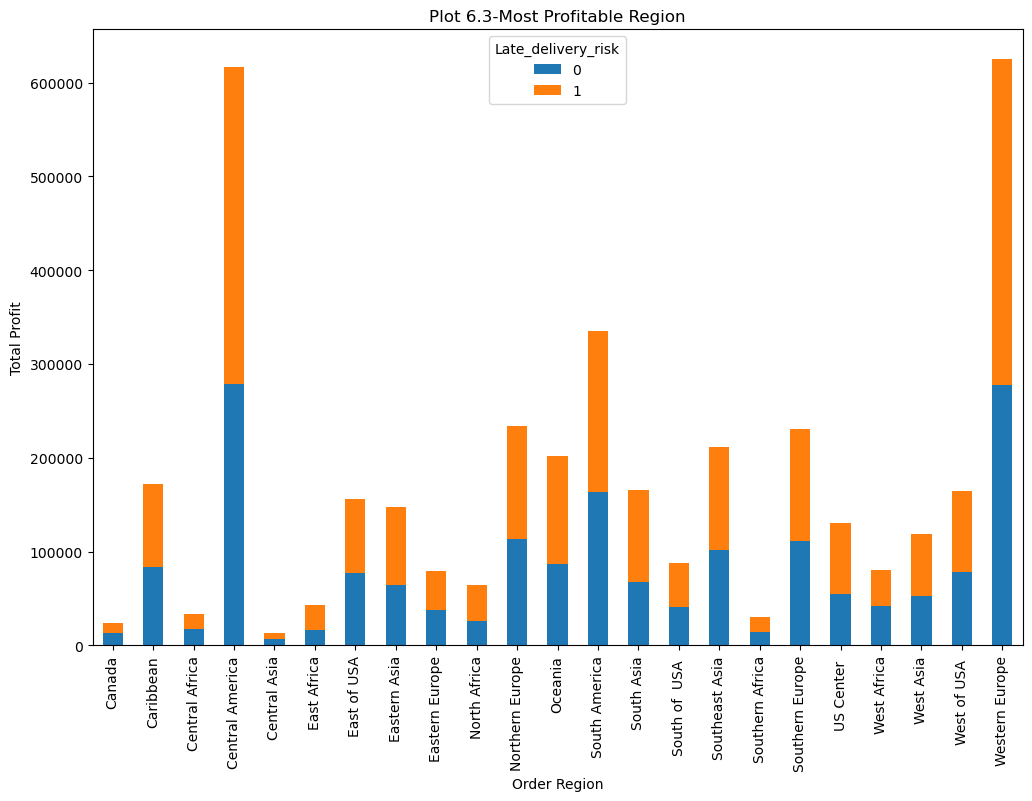

In [35]:
df1 = df.groupby(['Order Region', 'Late_delivery_risk'])['Order Profit Per Order'].sum().reset_index()
# reset_index() will convert df1 into DataFrame with grouped columns as regular column. 
#It will also assign a new index to the DataFrame that is sequential integer index starting from 0.
df1 = df1.sort_values(by='Order Profit Per Order', ascending=False)
top_marketsdf = df1.groupby('Order Region').head(5)
fig, df2 = plt.subplots(figsize=(12, 8))
top_marketsdf.pivot('Order Region', 'Late_delivery_risk', 'Order Profit Per Order').plot(kind='bar', stacked=True, ax=df2)
df2.set_title('Plot 6.3-Most Profitable Region')
df2.set_xlabel('Order Region')
df2.set_ylabel('Total Profit')
plt.show()

### Profit Analysis Observations

**Plot 6.1-** The graph shows the most profitable product with Polar FT4 Heart Rate Monitor with the highest profit ratio.

**Plot 6.2-** This graph shows which segment has the most profitability with consumer been the segment with highest profit ratio.

**Plot 6.3-** The chart shows which regions are the most profitable, and whether late delivery risks affect profitability in those regions.  
